In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('../data/spotify_songs.csv', encoding='latin-1' )
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [7]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Text(0, 0.5, 'Count')

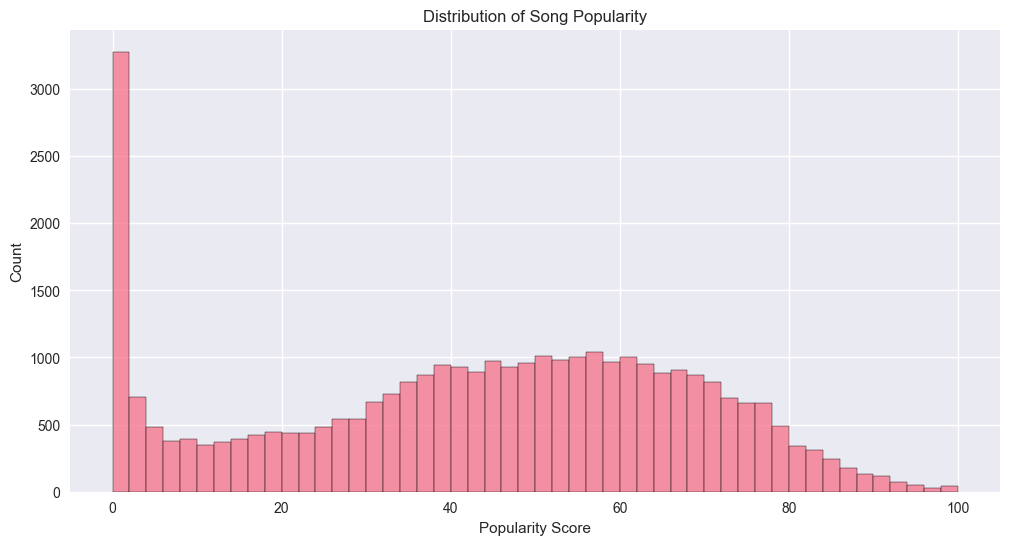

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='track_popularity', bins=50)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Matrix of Audio Features')

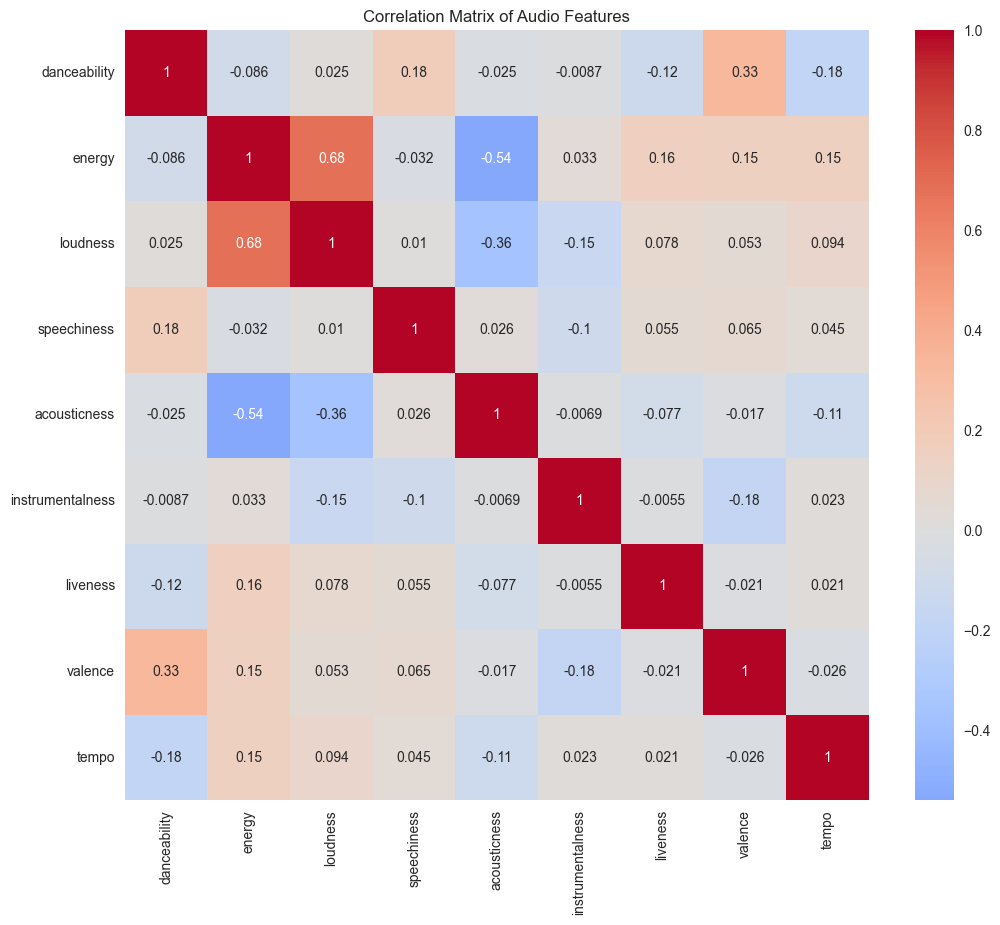

In [9]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plt.figure(figsize=(12, 10))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Audio Features')

Text(0.5, 1.0, 'Popularity Distribution by Genre')

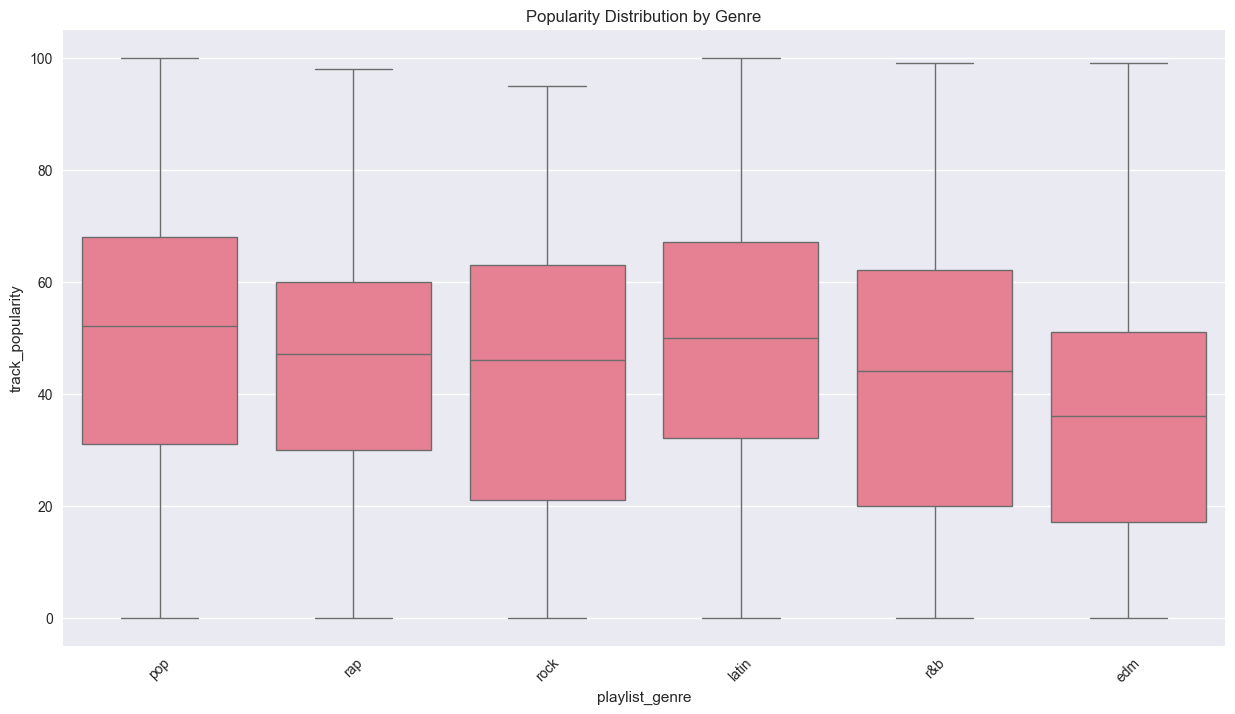

In [12]:
top_10_genres = df['playlist_genre'].value_counts().nlargest(10).index
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[df['playlist_genre'].isin(top_10_genres)], 
            x='playlist_genre', y='track_popularity')
plt.xticks(rotation=45)
plt.title('Popularity Distribution by Genre')

Text(0.5, 1.0, 'Energy vs Danceability by Genre')

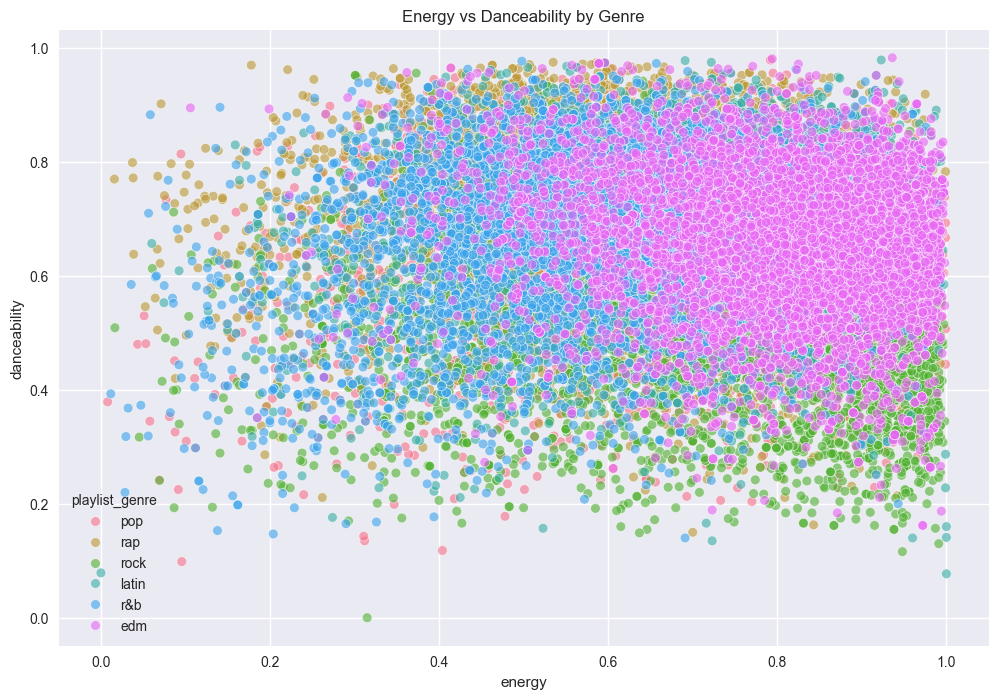

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['playlist_genre'].isin(top_10_genres)], 
                x='energy', y='danceability', hue='playlist_genre', alpha=0.6)
plt.title('Energy vs Danceability by Genre')

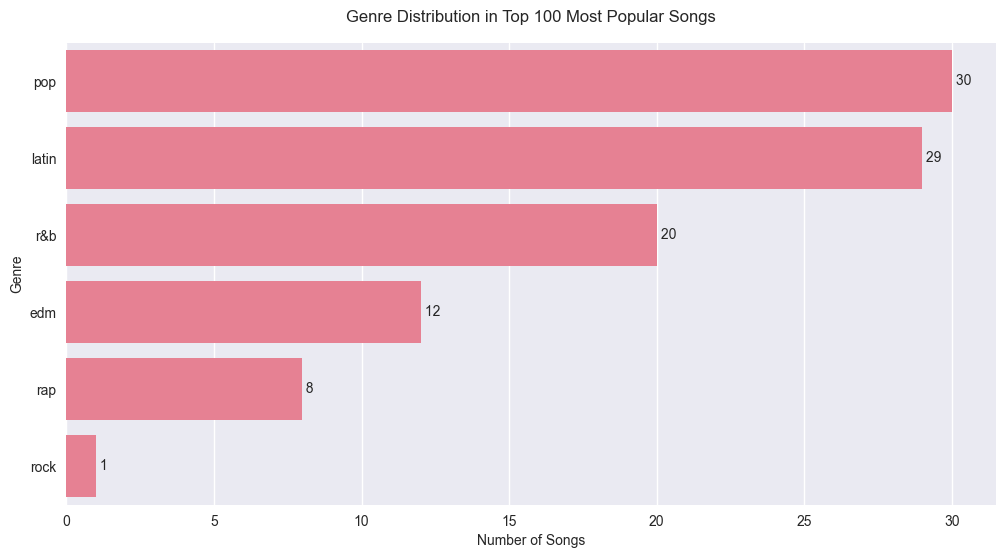

In [17]:
plt.figure(figsize=(12, 6))
top_50_songs = df.nlargest(100, 'track_popularity')
genre_counts = top_50_songs['playlist_genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index)

plt.title('Genre Distribution in Top 100 Most Popular Songs', fontsize=12, pad=15)
plt.xlabel('Number of Songs', fontsize=10)
plt.ylabel('Genre', fontsize=10)
for i, v in enumerate(genre_counts.values):
    plt.text(v, i, f' {v}', va='center')

plt.show()

Text(0, 0.5, 'Energy')

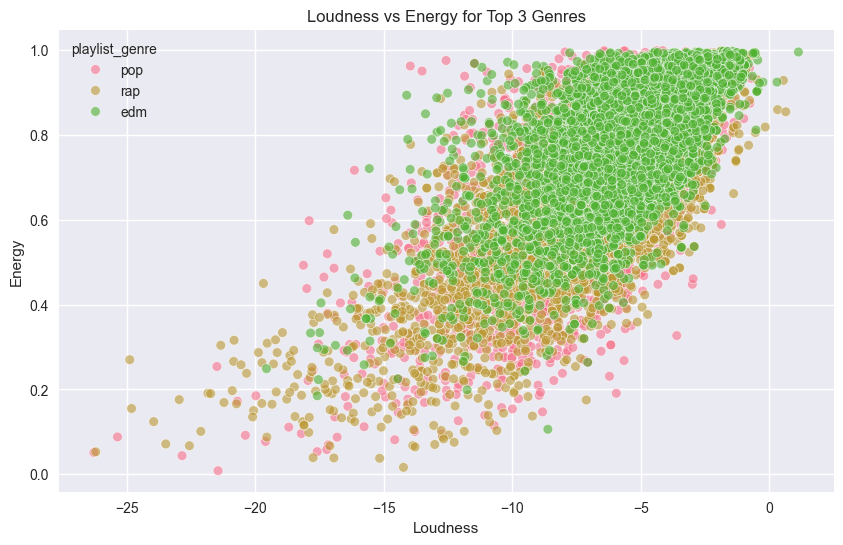

In [18]:
top_3_genres = df['playlist_genre'].value_counts().head(3).index
plt.figure(figsize=(10, 6))
genre_subset = df[df['playlist_genre'].isin(top_3_genres)]
sns.scatterplot(data=genre_subset, x='loudness', y='energy', hue='playlist_genre', alpha=0.6)
plt.title('Loudness vs Energy for Top 3 Genres')
plt.xlabel('Loudness')
plt.ylabel('Energy')

Text(0, 0.5, 'Song Name')

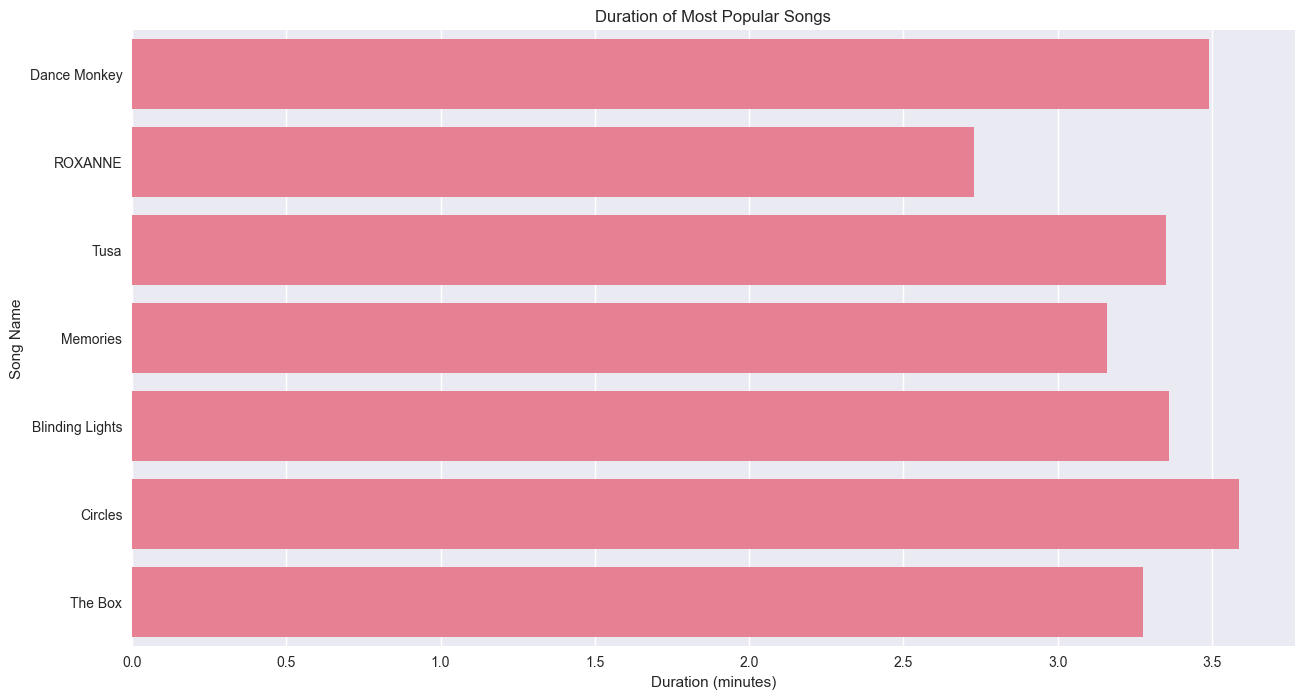

In [19]:
plt.figure(figsize=(15, 8))
top_20_songs = df.nlargest(20, 'track_popularity')
top_20_songs['duration_min'] = top_20_songs['duration_ms'] / 60000

sns.barplot(x='duration_min', y='track_name', data=top_20_songs)
plt.title('Duration of Most Popular Songs')
plt.xlabel('Duration (minutes)')
plt.ylabel('Song Name')

/var/folders/tw/xlzwf32j2ws090n4t56msmh80000gn/T/ipykernel_89857/2777571801.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered.groupby('playlist_genre').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)


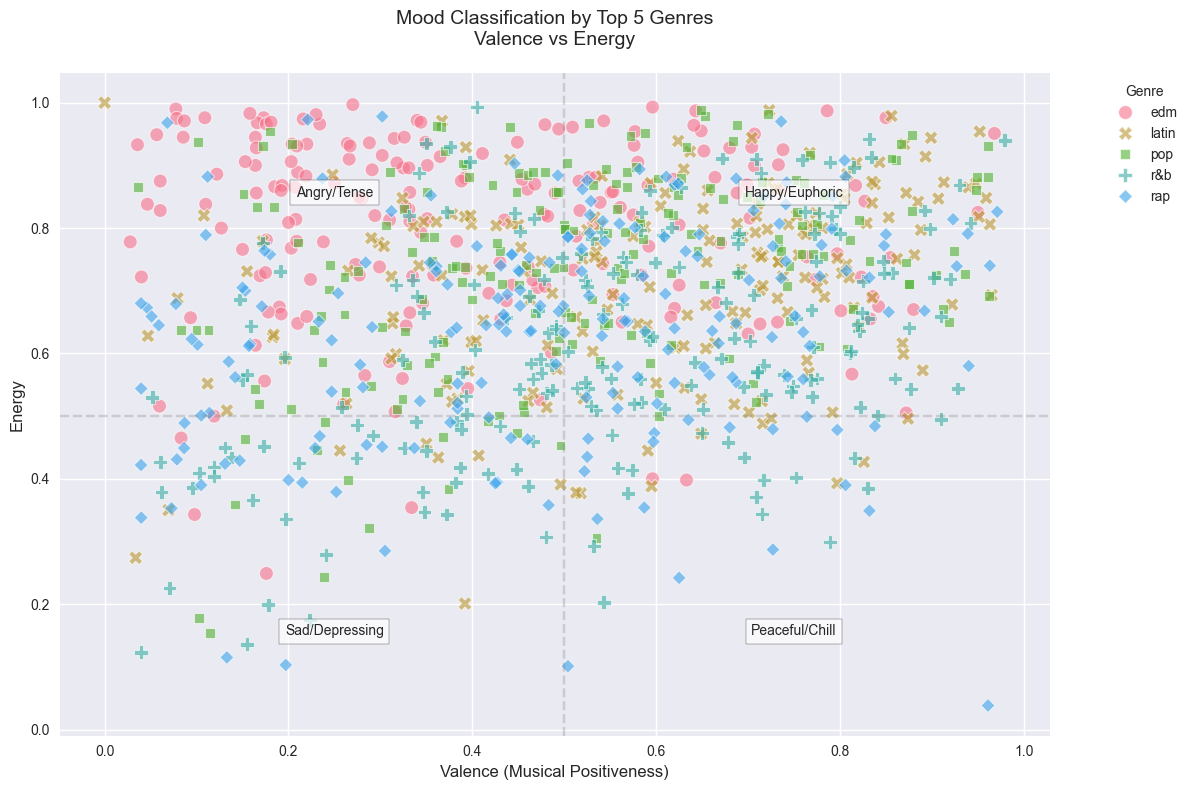

In [20]:
# mood classification
plt.figure(figsize=(12, 8))

top_5_genres = df['playlist_genre'].value_counts().head(5).index
df_filtered = df[df['playlist_genre'].isin(top_5_genres)]

df_sampled = df_filtered.groupby('playlist_genre').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)

sns.scatterplot(data=df_sampled, 
                x='valence', 
                y='energy',
                hue='playlist_genre',
                style='playlist_genre',
                s=100,
                alpha=0.6)

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)

plt.text(0.25, 0.85, 'Angry/Tense', 
         horizontalalignment='center', 
         bbox=dict(facecolor='white', alpha=0.7))
plt.text(0.75, 0.85, 'Happy/Euphoric', 
         horizontalalignment='center',
         bbox=dict(facecolor='white', alpha=0.7))
plt.text(0.25, 0.15, 'Sad/Depressing', 
         horizontalalignment='center',
         bbox=dict(facecolor='white', alpha=0.7))
plt.text(0.75, 0.15, 'Peaceful/Chill', 
         horizontalalignment='center',
         bbox=dict(facecolor='white', alpha=0.7))

plt.title('Mood Classification by Top 5 Genres\nValence vs Energy', pad=20, fontsize=14)
plt.xlabel('Valence (Musical Positiveness)', fontsize=12)
plt.ylabel('Energy', fontsize=12)

plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

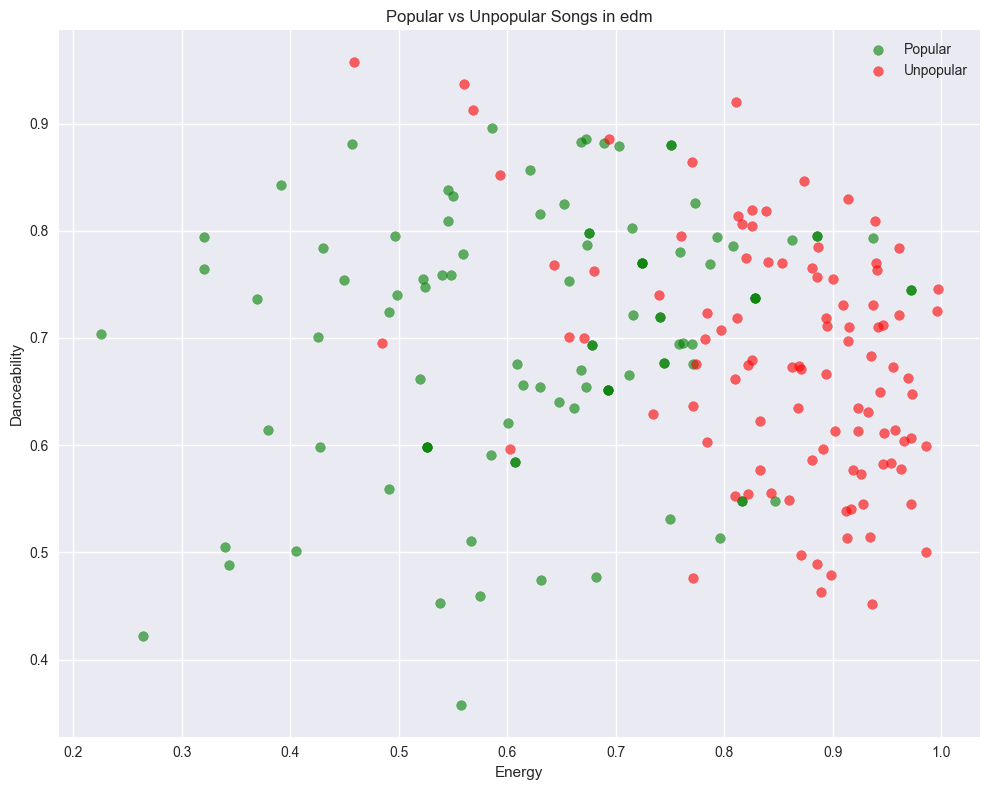

In [21]:
most_common_genre = df['playlist_genre'].value_counts().index[0]
genre_df = df[df['playlist_genre'] == most_common_genre].copy()

popular_songs = genre_df.nlargest(100, 'track_popularity')
unpopular_songs = genre_df.nsmallest(100, 'track_popularity')

plt.figure(figsize=(10, 8))
plt.scatter(popular_songs['energy'], popular_songs['danceability'], 
          alpha=0.6, label='Popular', color='green')
plt.scatter(unpopular_songs['energy'], unpopular_songs['danceability'], 
          alpha=0.6, label='Unpopular', color='red')

plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title(f'Popular vs Unpopular Songs in {most_common_genre}')
plt.legend()
plt.tight_layout()
plt.show()

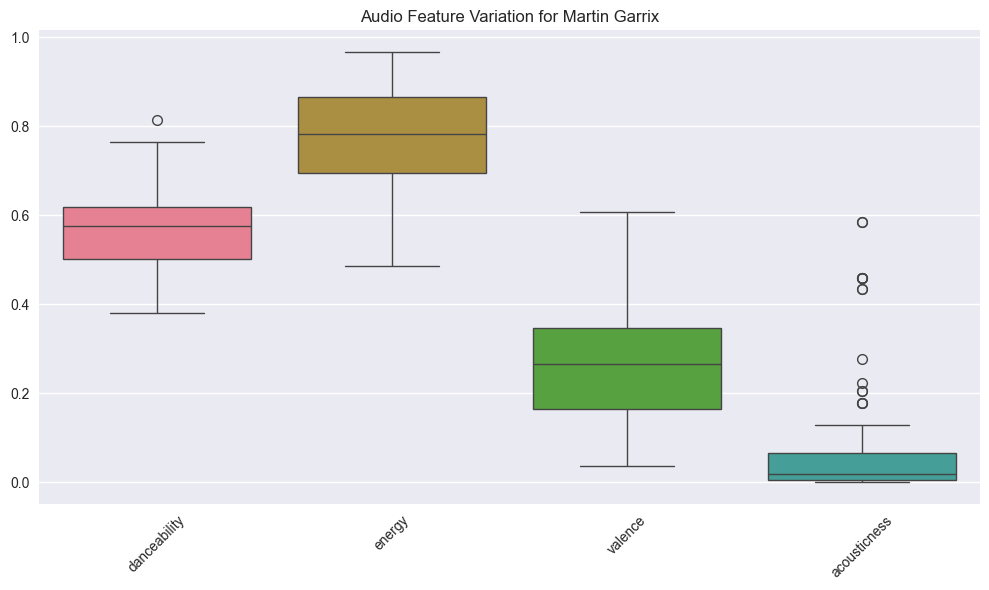

In [23]:
popular_artist = df['track_artist'].value_counts().index[0]
artist_songs = df[df['track_artist'] == popular_artist]

plt.figure(figsize=(10, 6))
features = ['danceability', 'energy', 'valence', 'acousticness']
sns.boxplot(data=artist_songs[features])
plt.title(f'Audio Feature Variation for {popular_artist}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

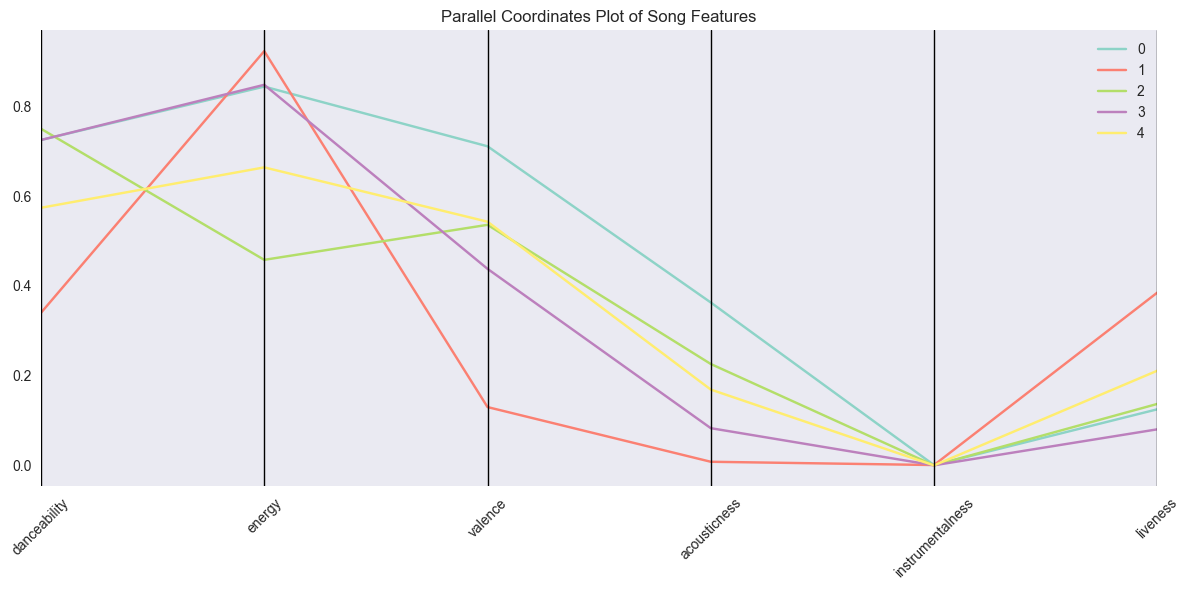

In [24]:

features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness']
sample_songs = df.sample(5)

sample_songs['id'] = range(len(sample_songs))
plt.figure(figsize=(12, 6))
parallel_coordinates(sample_songs[features + ['id']], 'id', colormap=plt.cm.Set3)
plt.title('Parallel Coordinates Plot of Song Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()